In [1]:
# Here we will try to predict surviving of Tytanic passengers depending on different factors
# Istruments that we will use is:
# - decision tree
# - random forest

In [2]:
import pandas as pd
import numpy as np
from sklearn import tree

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import math as m

from IPython.display import SVG
from IPython.display import display
from graphviz import Source

In [3]:
from IPython.display import HTML
style = "<style>svg{width:70% !important; height: 70% !important;}</style>"
HTML(style)

In [4]:
# Implementing cross-validation
from sklearn.model_selection import cross_val_score

In [5]:
# Loading test dataframe
test_df = pd.read_csv('./titanic/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Loading train dataframe
train_df = pd.read_csv('./titanic/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Find Null values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Filter our features - X and the point - y
X = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Survived', 'Cabin'], axis=1)
y = train_df.Survived

In [9]:
# Delete strings variables
X = pd.get_dummies(X)
# sex --> [Sex_female, Sex_male]
# Embarked --> [Embarked_C, Embarked_Q, Embarked_S]
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [10]:
# Fill Nan values by median to get rid of them
median = X.Age.median()
X = X.fillna(median)
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [11]:
# Create decision tree classifyer
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [12]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

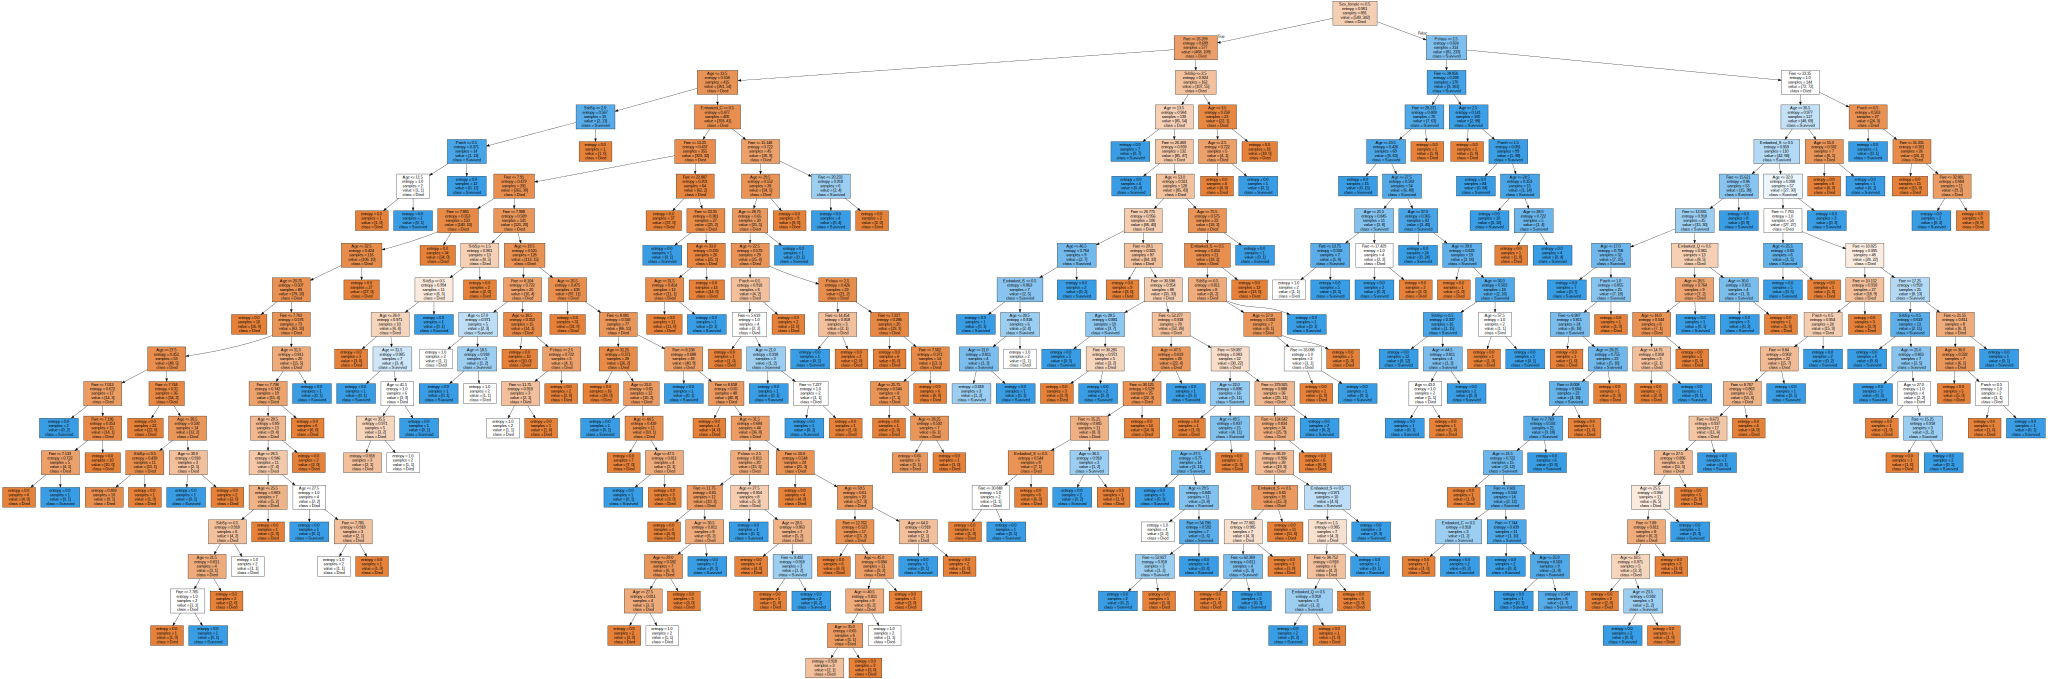

In [13]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=list(X),
                                    class_names=['Died', 'Survived'],
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

In [14]:
# Learn model on testing data
from sklearn.model_selection import train_test_split

In [15]:
# Test size = 33%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [17]:
clf.score(X_train, y_train)

0.9798657718120806

In [18]:
clf.score(X_test, y_test)

0.7762711864406779

In [19]:
# Limit decision tree deep
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [20]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [21]:
clf.score(X_train, y_train)

0.8238255033557047

In [22]:
clf.score(X_test, y_test)

0.8203389830508474

In [23]:
scores_data = pd.DataFrame()

In [24]:
# Find optimal paramenets
max_depth_values = range(1, 50)
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_dataframe = pd.DataFrame({'max_depth': [max_depth], 
                                   'train_score': train_score, 
                                   'test_score': test_score,
                                   'cross_val_score': [mean_cross_val_score]})
    
#     scores_data = scores_data.append(temp_dataframe)
    scores_data = pd.concat([scores_data, temp_dataframe])

In [25]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.797031


In [26]:
# Rebuild DataFrame
scores_data_long = pd.melt(scores_data, 
                                    id_vars=['max_depth'], 
                                    value_vars=['train_score', 'test_score', 'cross_val_score'],
                                    var_name='set_type', 
                                    value_name='score')
scores_data_long.query('set_type == "cross_val_score"').head(10)

,max_depth,set_type,score
98,1,cross_val_score,0.781961
99,2,cross_val_score,0.770196
100,3,cross_val_score,0.790322
101,4,cross_val_score,0.788627
102,5,cross_val_score,0.797031
103,6,cross_val_score,0.802073
104,7,cross_val_score,0.797017
105,8,cross_val_score,0.805406
106,9,cross_val_score,0.793627
107,10,cross_val_score,0.802031


<AxesSubplot:xlabel='max_depth', ylabel='score'>

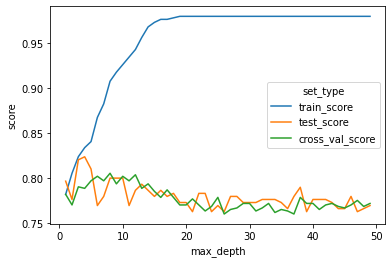

In [27]:
sns.lineplot(data=scores_data_long, x='max_depth', y='score', hue='set_type')

In [28]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [29]:
# Cross-valididation with folds strategy. cv means amount of folds
cross_val_score(best_clf, X_test, y_test, cv=5).mean()

0.7830508474576272

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
parameters = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

In [32]:
# Create Grid|SearchCV classifier
clf = tree.DecisionTreeClassifier()
grid_search_cv_clf = GridSearchCV(clf, parameters, cv=5)

In [33]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [34]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [35]:
best_clf = grid_search_cv_clf.best_estimator_

In [36]:
# Best classifier
best_clf.score(X_test, y_test)

0.8

In [37]:
from sklearn.metrics import precision_score, recall_score

In [38]:
# Prediction probability: true/false array
y_pred_probabilities = best_clf.predict(X_test)
y_pred_probabilities

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0])

In [39]:
# Find precission
precision_score(y_test, best_clf.predict(X_test), average='macro')

0.8075428510592995

In [40]:
# Find recall
recall_score(y_test, best_clf.predict(X_test), average='macro')

0.7751190476190477

In [41]:
y_pred_probability = best_clf.predict_proba(X_test)
y_pred_probability[0:9]

array([[0.8852459 , 0.1147541 ],
       [0.61538462, 0.38461538],
       [0.8852459 , 0.1147541 ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.25      , 0.75      ],
       [0.8852459 , 0.1147541 ],
       [0.25      , 0.75      ]])

<AxesSubplot:>

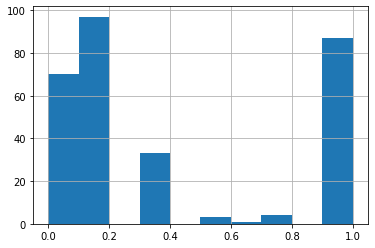

In [42]:
pd.Series(y_pred_probability[:, 1]).hist()

In [43]:
# If probability > 0.8 => 1, else 0
y_pred_1 = np.where(y_pred_probability[:, 1] > 0.8, 1, 0)

<AxesSubplot:>

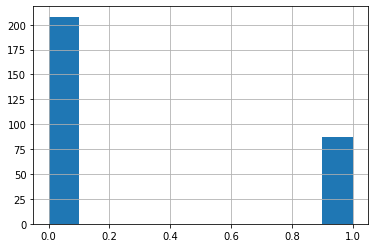

In [44]:
pd.Series(y_pred_1).hist()

In [45]:
# Find precission
precision_score(y_test, y_pred_1, average='macro')

0.8065594606542883

In [46]:
# Find recall
recall_score(y_test, y_pred_1, average='macro')

0.7641666666666667

In [47]:
# If probability > 0.2 => 1, else 0
y_pred_2 = np.where(y_pred_probability[:, 1] > 0.2, 1, 0)

In [48]:
# Find precission
precision_score(y_test, y_pred_2, average='macro')

0.8169442365269461

In [49]:
# Find recall
recall_score(y_test, y_pred_2, average='macro')

0.8226190476190476

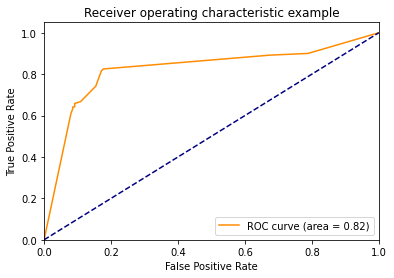

In [50]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probability[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [51]:
# Add a limit for our decision tree

In [52]:
# min_samples_split=100 - If amout of elemets less than 100 don't conunt it as a branch
clf = tree.DecisionTreeClassifier(criterion='entropy', 
                                  max_depth=3,
                                  min_samples_split=100,
                                  min_samples_leaf=10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

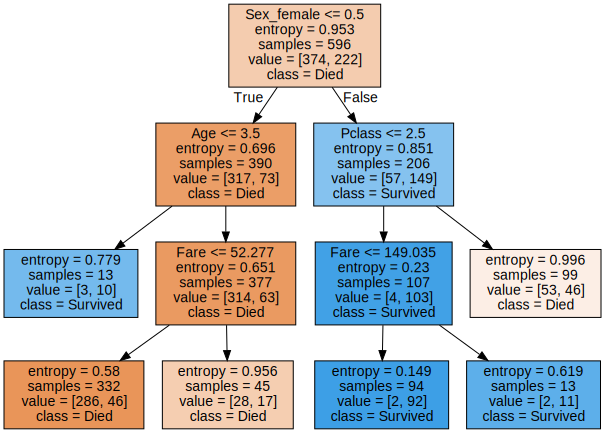

In [53]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=list(X),
                                    class_names=['Died', 'Survived'],
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

In [54]:
# Create random forest clasifier
from sklearn.ensemble import RandomForestClassifier

In [55]:
clf_rf = RandomForestClassifier()
parametrs = {'n_estimators': [10,20,30], 'max_depth': [2,5,7,10]}

grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)

In [56]:
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_

{'max_depth': 10, 'n_estimators': 30}

In [57]:
# Testing of a best clasifier
# The result must be better than decision tree result
best_clf = grid_search_cv_clf.best_estimator_
best_clf.score(X_test, y_test)

0.7966101694915254

In [58]:
# Feature inmportance
feature_importances = best_clf.feature_importances_
feature_importances_df = pd.DataFrame({'features':list(X_train.columns), 
                                       'feature_importances':  best_clf.feature_importances_})\
                        .sort_values(by='feature_importances', ascending=False)
feature_importances_df

,features,feature_importances
1,Age,0.213454
4,Fare,0.208276
6,Sex_male,0.193293
5,Sex_female,0.151027
0,Pclass,0.097576
2,SibSp,0.053909
3,Parch,0.035902
7,Embarked_C,0.017768
9,Embarked_S,0.017384
8,Embarked_Q,0.011411


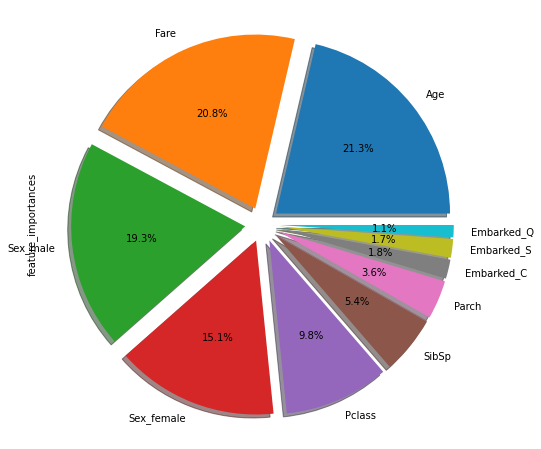

In [59]:
feature_importances_df.plot.pie(
                        explode=[0.1]*len(X_train.columns),
                        labels = feature_importances_df.features,
                        y = 'feature_importances',
                        autopct='%1.1f%%',
                        shadow=True,
                        legend=False,
                        figsize=(8, 8));